In [3]:
import pickle

with open("./cifar-100-python/meta", "rb") as f:
    dataset_meta = pickle.load(f, encoding='bytes')

with open("./cifar-100-python/test", "rb") as f:
    dataset_test = pickle.load(f, encoding='bytes')

with open("./cifar-100-python/train", "rb") as f:
    dataset_train = pickle.load(f, encoding='bytes')

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset_train.keys()
import os

In [48]:
#Construct the dataframe
df_train = pd.DataFrame({
    "filenames": dataset_train[b'filenames'],
    "labels": dataset_train[b'fine_labels'],
    "row": range(len(dataset_train[b'filenames']))
})

In [49]:
df_train.head()

,filenames,labels,row
0,b'bos_taurus_s_000507.png',19,0
1,b'stegosaurus_s_000125.png',29,1
2,b'mcintosh_s_000643.png',0,2
3,b'altar_boy_s_001435.png',11,3
4,b'cichlid_s_000031.png',1,4


In [47]:
#creating a drop function for labels which are not 8 or 48
def unnesdrop(df):
    index_names = df[(df['labels'] !=8) & (df['labels'] !=48)].index
    df.drop(index_names, inplace = True)
    return
    

In [50]:
unnesdrop(df_train)

In [44]:
# Drop all rows from df_train where label is not 8 or 48
index_names = df_train[(df_train['labels'] != 8) & (df_train['labels'] != 48) ].index

ValueError: ('Lengths must match to compare', (1000,), (2,))

In [34]:
df_train.drop(index_names, inplace = True)

In [51]:
df_train.head()

,filenames,labels,row
16,b'bike_s_000682.png',8,16
30,b'bike_s_000127.png',8,30
130,b'cycle_s_002598.png',8,130
152,b'minibike_s_000824.png',48,152
195,b'motorcycle_s_001856.png',48,195


In [36]:
# Decode df_train.filenames so they are regular strings
df_train["filenames"] = df_train["filenames"].apply(
    lambda x: x.decode("utf-8")
)

In [38]:
df_test = pd.DataFrame({
    "filenames": dataset_test[b'filenames'],
    "labels": dataset_test[b'fine_labels'],
    "row": range(len(dataset_test[b'filenames']))
})

In [39]:
test_index_names = df_test[(df_test['labels'] != 8) & (df_test['labels'] != 48) ].index

In [40]:
# Drop all rows from df_test where label is not 8 or 48
df_test.drop(test_index_names, inplace = True)

In [41]:
# Decode df_test.filenames so they are regular strings
df_test["filenames"] = df_test["filenames"].apply(
    lambda x: x.decode("utf-8")
)

In [42]:
df_test.head()

,filenames,labels,row
27,safety_bike_s_000390.png,8,27
28,bike_s_000658.png,8,28
116,velocipede_s_001744.png,8,116
161,bike_s_000643.png,8,161
319,ordinary_bicycle_s_000437.png,8,319


In the previous sections we introduced you to several key snippets of code:

1. Grabbing the image data:

```python
dataset_train[b'data'][0]
```

2. A simple idiom for stacking the image data into the right shape

```python
import numpy as np
np.dstack((
    row[0:1024].reshape(32,32),
    row[1024:2048].reshape(32,32),
    row[2048:].reshape(32,32)
))
```

3. A simple `matplotlib` utility for saving images

```python
plt.imsave(path+row['filenames'], target)
```

Compose these together into a function that saves all the images into the `./test` and `./train` directories. Use the comments in the body of the `save_images` function below to guide your construction of the function:


In [52]:
import os.path
def save_images():
    #Grab the image data in row-major form
    row = dataset_train_x[i]
    red, green, blue = row[0:1024], row[1024:2048], row[2048:]

    # Each 32 items in the channel are a row in the 32x32 image
    red = red.reshape(32,32)
    green = green.reshape(32,32)
    blue = blue.reshape(32,32)

    # Combine the channels into a 32x32x3 image!
    img = np.dstack((red,green,blue))
    # Consolidated stacking/reshaping from earlier
    target = dataset_meta[b'fine_label_names'][dataset_train[b'fine_labels'][i]]
    
    # Save the image
    path = os.path("train")
    plt.imsave(path+row['filenames'], target)
    # Return any signal data you want for debugging
    return

## TODO: save ALL images using the save_images function

In [53]:
for i in range(10):
    save_images()

TypeError: 'module' object is not callable

In [6]:
dataset_train_x = dataset_train[b'data']
data_train_x = dataset_meta[b'fine_label_names'][dataset_train[b'fine_labels'][n]]

TypeError: list indices must be integers or slices, not list

In [14]:
for i in dataset_train_x:
    row = i
    """red, green, blue = row[0:1024], row[1024:2048], row[2048:]
    red = red.reshape(32,32)
    green = green.reshape(32,32)
    blue = blue.reshape(32,32)
    #Grab the image data in row-major form
    img = np.dstack((red,green,blue))"""

SyntaxError: invalid syntax (Temp/ipykernel_6848/4077246391.py, line 2)

In [13]:
row.shape

(3072,)

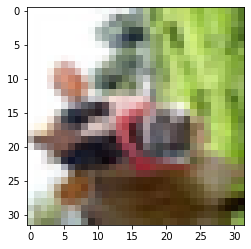

In [11]:
data = dataset_train_x[ 0, :] # get a row data
data = np.reshape(data, (32,32,3), order='F' ) # Fortran-like indexing order
plt.imshow(data)

In [84]:
dataset_train_x=dataset_train_x.reshape(-1,3,32,32)

In [85]:
dataset_train_x

array([[[[255, 255, 255, ..., 195, 212, 182],
         [255, 254, 254, ..., 170, 161, 146],
         [255, 254, 255, ..., 189, 166, 121],
         ...,
         [148, 142, 140, ...,  30,  65,  76],
         [122, 120, 126, ...,  22,  97, 141],
         [ 87,  88, 101, ...,  34, 105, 138]],

        [[255, 255, 255, ..., 205, 224, 194],
         [255, 254, 254, ..., 176, 168, 154],
         [255, 254, 255, ..., 199, 178, 133],
         ...,
         [185, 182, 179, ...,  17,  62,  77],
         [157, 155, 160, ...,  16, 112, 161],
         [122, 122, 134, ...,  36, 133, 173]],

        [[255, 255, 255, ..., 193, 204, 167],
         [255, 254, 254, ..., 150, 130, 113],
         [255, 254, 255, ..., 169, 130,  87],
         ...,
         [ 79,  57,  60, ...,   1,  15,  20],
         [ 66,  58,  71, ...,   3,  56,  87],
         [ 41,  39,  56, ...,  10,  59,  79]]],


       [[[255, 253, 253, ..., 253, 253, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 

In [ ]:
import numpy as np

# Each 1024 in a row is a channel (red, green, then blue)
row = dataset_train[b'data'][8]
red, green, blue = row[0:1024], row[1024:2048], row[2048:]

# Each 32 items in the channel are a row in the 32x32 image
red = red.reshape(32,32)
green = green.reshape(32,32)
blue = blue.reshape(32,32)

# Combine the channels into a 32x32x3 image!
combined = np.dstack((red,green,blue))

In [ ]:
plt.imsave("file.png", test_image)

In [62]:
import matplotlib.pyplot as plt
plt.imshow(test_image);

NameError: name 'test_image' is not defined